c_1 = 0.6000000000000002
c_2 = 2.4999999999999996
c_3 = -1.0


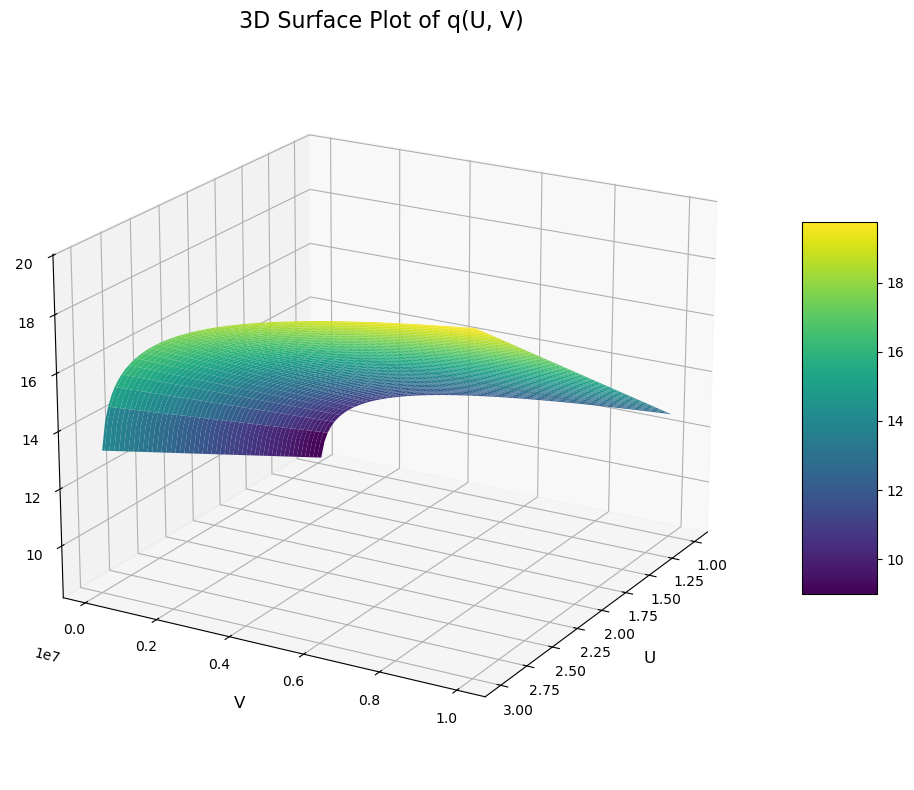

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



def q_(x, c_1, c_2, c_3):
    u, V = x
    return c_1 * (u + c_2) * (np.log10(V) + c_3)


u = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
V = np.array([10**5, 10**5, 10**5, 10**6, 10**6, 10**6, 10**7, 10**7, 10**7])
q_values = np.array([8.4, 10.8, 13.2, 10.5, 13.5, 16.5, 12.6, 16.2, 19.8])
xdata = (u, V)

# 初始猜测值
initial_guess = [1, 1, 1]

# 进行曲线拟合
popt, pcov = curve_fit(q_, xdata, q_values, p0=initial_guess)

c_1, c_2, c_3 = popt

print(f"c_1 = {c_1}")
print(f"c_2 = {c_2}")
print(f"c_3 = {c_3}")

#作图
U_p = np.linspace(1, 3, 100)
V_p = np.linspace(10**5, 10**7, 100)
U_grid, V_grid = np.meshgrid(U_p, V_p)
q_p = q_((U_grid,V_grid), c_1, c_2, c_3)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(U_grid, V_grid, q_p, cmap=cm.viridis, edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)


ax.set_xlabel('U', fontsize=12, labelpad=10)
ax.set_ylabel('V', fontsize=12, labelpad=10)
ax.set_zlabel('q', fontsize=12, labelpad=10)
ax.set_title('3D Surface Plot of q(U, V)', fontsize=16)

ax.view_init(elev=20, azim=30)


plt.tight_layout()
plt.show()

a_1 = 5e-05
a_2 = 0.15
b = 1.0


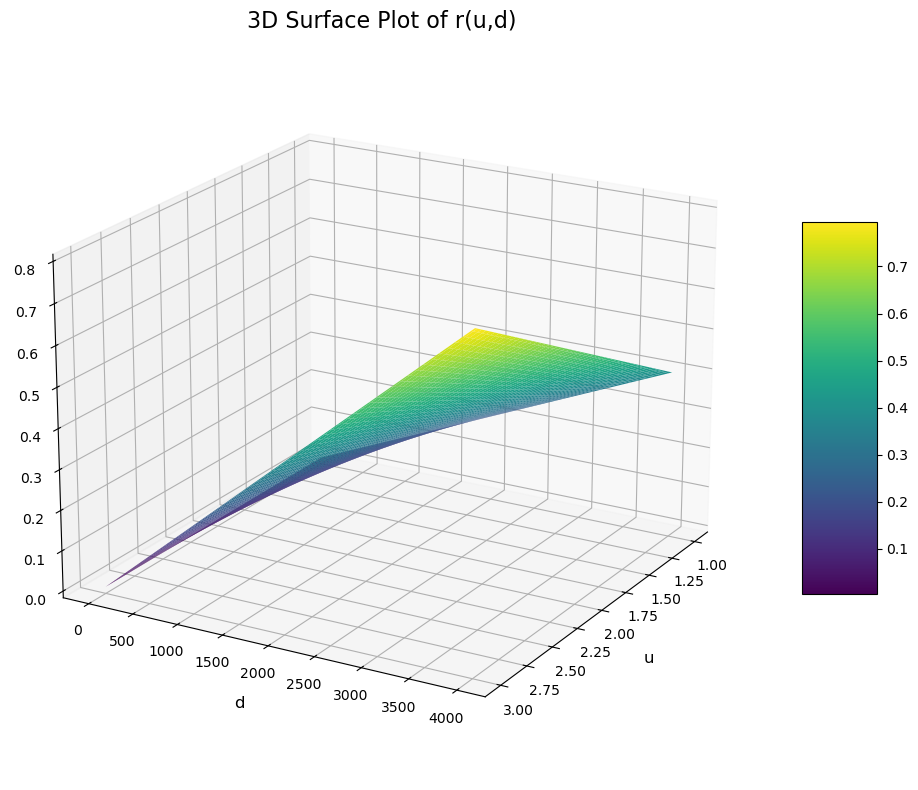

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



def r(X, a_1, a_2, b):
    u, d = X
    return np.where(d <= 4000, a_1 * d * (1 + b * u), a_2 * (1 + b * u))
    

u = np.array([1,2,3,1,2,3,1,2,3])
d = np.array([0,0,0,1000,1000,1000,4001,4001,4001])
X = (u,d)
r_values = np.array([0,0,0,0.1,0.15,0.2,0.3,0.45,0.6])


popt,pcov = curve_fit(r,X,r_values)
a_1,a_2,b = popt


print(f"a_1 = {a_1}")
print(f"a_2 = {a_2}")
print(f"b = {b}")

#作图
u_p = np.linspace(1, 3, 100)
d_p = np.linspace(0, 4000, 100)
u_grid, d_grid = np.meshgrid(u_p, d_p)
r_p = r((u_grid,d_grid), a_1, a_2, b)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(u_grid, d_grid, r_p, cmap=cm.viridis, edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5)


ax.set_xlabel('u', fontsize=12, labelpad=10)
ax.set_ylabel('d', fontsize=12, labelpad=10)
ax.set_zlabel('r', fontsize=12, labelpad=10)
ax.set_title('3D Surface Plot of r(u,d)', fontsize=16)

ax.view_init(elev=20, azim=30)


plt.tight_layout()
plt.show()

In [94]:



def r(u,t):
    if t<=1000/(6*u):
        return 1.56*10**(-3)*u*(1+0.4*u)*t
    else:
        return 0.2*(1+0.4*u)
    

def V(u,V_0,t):
    sum = 0
    for i in range(1,t+1):
        sum += r(u,i)
    return 4*np.pi/3 * (   ( (3*V_0)/(4*np.pi) )**(1/3)  -  sum)**3


def q(u,V_0,t):
    return 7.2*u*(u+6)*( np.log10(V(u,V_0,t))-1 )


def f(V_0):
    if V_0 <=5*10**5:
        return 4.0
    if V_0 > 5*10**5 and V_0 <= 10**6:
        return 6.2
    if V_0 > 10**6 and V_0 <= 10**7:
        return 8.0
    

def S(u,V_0,t):
    sum = 0
    for i in range(1,t+1):
        sum += q(u,V_0,i)
    return 400*f(V_0)/u + sum


#问题3
print(q(2,10**6,10))
print(S(2,10**6,10))

575.2508062328458
6997.005794430563


In [ ]:
import numpy as np
from scipy.optimize import minimize


def r(u, t):
    if t <= 1000 / (6 * u):
        return 1.56 * 10 ** (-3) * u * (1 + 0.4 * u) * t
    else:
        return 0.2 * (1 + 0.4 * u)


def V(u, V_0, t):
    sum_val = 0
    for i in range(1, int(t) + 1):
        sum_val += r(u, i)
    return 4 * np.pi / 3 * (((3 * V_0) / (4 * np.pi)) ** (1 / 3) - sum_val) ** 3


def q(u, V_0, t):
    return 7.2 * u * (u + 6) * (np.log10(V(u, V_0, t)) - 1)


def f(V_0):
    if V_0 <= 5 * 10 ** 5:
        return 4.0
    elif V_0 <= 10 ** 6:
        return 6.2
    elif V_0 <= 10 ** 7:
        return 8.0
    return 8.0


def S(u, V_0, t):
    sum_val = 0
    for i in range(1, int(t) + 1):
        sum_val += q(u, V_0, i)
    return 400 * f(V_0) / u + sum_val


def W(u, V_0, T):
    return V(u, V_0, T) * 3.4 / 4


def Y(u, V_0, T):
    return S(u, V_0, T) / W(u, V_0, T)


def calculate_T(u, d):
    return d / (24 * u)


# 定义一个函数来包装 Y 函数，以便使用 minimize 进行优化
def objective(V_0, u, d):
    T = calculate_T(u, d)
    result = Y(u, V_0, T)
    # 检查结果是否为 NaN 或无穷大
    if np.isnan(result) or np.isinf(result):
        print(f"Warning: objective function returned {result} for V_0 = {V_0}")
    return result


# 给定船速 u 和距离 d
u = 4.5
d = 9600
V_0_initial_guess =  10 ** 7

# 设置 V0 的搜索范围
bounds = [(10**5, 10**7)]

# 尝试不同的优化算法，并增加最大迭代次数，设置搜索范围
result = minimize(objective, V_0_initial_guess, args=(u, d), method='Nelder-Mead', options={'maxiter': 10000}, bounds=bounds)


if result.success:
    min_Y = result.fun
    optimal_V_0 = result.x[0]
    print(f"Y 的最小值: {min_Y}")
    print(f"对应的 V0 值: {optimal_V_0}")
else:
    print("优化失败:", result.message)
    
    

Y 的最小值: 0.06436697344412765
对应的 V0 值: 10000000.0
